In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.utils import plot_model

# Crée un modèle avec une seule couche dense
layer_0 = keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([layer_0])

# Compile le modèle avec une fonction de perte et un optimiseur
opt = tf.keras.optimizers.SGD()
model.compile(optimizer=opt, loss='mean_squared_error')

# Affiche un aperçu du modèle avec ses paramètres
print(model.summary())



Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# Utilise Tensorboard pour visualiser les statistiques d'entraînement
%load_ext tensorboard
import datetime, os

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


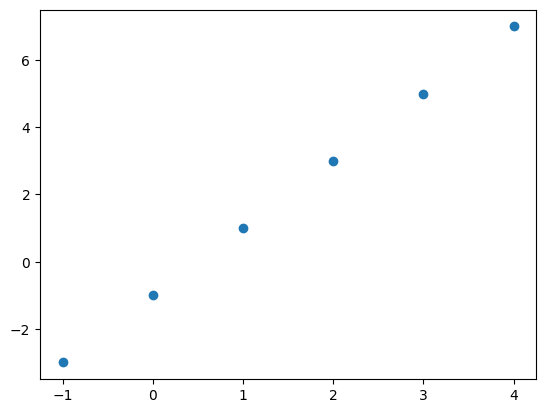

In [ ]:

# Crée un jeu de données simple (entrées + sorties)
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

# Affiche le jeu de données avec matplotlib
import matplotlib.pyplot as plt
plt.scatter(xs, ys)
plt.show()

In [ ]:
# Utilise Tensorboard pour visualiser les statistiques d'entraînement
%tensorboard --logdir logs



Reusing TensorBoard on port 6006 (pid 17944), started 0:37:20 ago. (Use '!kill 17944' to kill it.)

In [ ]:
!kill 17944

'kill' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
# Entraîne le modèle
model.fit(xs, ys, epochs=500)

# Effectue une prédiction sur de nouvelles données
# ...

# Améliorations futures possibles :
# - Variations de l'optimiseur (par exemple, changer le batch_size)
# - Utilisation de plusieurs neurones
# - Ajout de plusieurs couches
# - Utilisation d'un jeu de données plus grand en 1D ou en plusieurs dimensions
# - Expérimentation avec différents types de fonctions de perte
# - Utilisation de jeux de données réels

# Continuez à explorer et à expérimenter pour apprendre davantage !

In [ ]:
# Effectue une prédiction sur de nouvelles données
new_data = np.array([5.0, 6.0, 7.0], dtype=float)
predictions = model.predict(new_data)
print("Prédictions pour de nouvelles données:")
for i in range(len(new_data)):
    print(f"Entrée : {new_data[i]}, Prédiction : {predictions[i][0]}")


1/1 [==============================] - 0s 52ms/step
Prédictions pour de nouvelles données:
Entrée : 5.0, Prédiction : 8.996606826782227
Entrée : 6.0, Prédiction : 10.994820594787598
Entrée : 7.0, Prédiction : 12.993034362792969


In [ ]:
# Améliorations futures possibles :
# - Variations de l'optimiseur (par exemple, changer le batch_size)

In [ ]:
# Variations de l'optimiseur en changeant le batch_size
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

# Batch size initial
batch_size = 1

# Créez une liste d'optimiseurs que vous souhaitez expérimenter
optimizers = [SGD(lr=0.01), Adam(learning_rate=0.01), RMSprop(lr=0.01)]

for optimizer in optimizers:
    # Créez un nouveau modèle avec l'optimiseur actuel
    model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Affichez le nom de l'optimiseur
    optimizer_name = type(optimizer).__name__
    print(f"Optimiseur en cours : {optimizer_name}")

    # Entraînez le modèle avec le batch_size actuel
    model.fit(xs, ys, epochs=500, batch_size=batch_size)

    # Effectuez une prédiction avec le modèle entraîné
    predictions = model.predict(new_data)
    print("Prédictions pour de nouvelles données:")
    for i in range(len(new_data)):
        print(f"Entrée : {new_data[i]}, Prédiction : {predictions[i][0]}")

    # Répétez ce processus pour chaque optimiseur


In [ ]:
# Utilisation de plusieurs neurones
from tensorflow.keras.optimizers import SGD

# Créez un modèle avec plusieurs neurones (par exemple, 4)
model = tf.keras.Sequential([
    keras.layers.Dense(units=4, input_shape=[1])  # Vous pouvez augmenter le nombre d'unités ici
])
model.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error')

# Entraînez le modèle
model.fit(xs, ys, epochs=500, batch_size=1)

# Effectuez une prédiction avec le modèle entraîné
predictions = model.predict(new_data)
print("Prédictions pour de nouvelles données:")
for i in range(len(new_data)):
    print(f"Entrée : {new_data[i]}, Prédiction : {predictions[i][0]}")


In [ ]:
import matplotlib.pyplot as plt

def plot_data_and_predictions(xs, ys, predictions=None):
    plt.scatter(xs, ys, label='Données réelles', c='b')
    if predictions is not None:
        plt.plot(xs, predictions, label='Prédictions du modèle', c='r')
    plt.xlabel('Entrées')
    plt.ylabel('Sorties')
    plt.legend()
    plt.show()

# Utilisation de plusieurs neurones
from tensorflow.keras.optimizers import SGD

# Créez un modèle avec plusieurs neurones (par exemple, 4)
model = tf.keras.Sequential([
    keras.layers.Dense(units=4, input_shape=[1])  # Vous pouvez augmenter le nombre d'unités ici
])
model.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error')

# Entraînez le modèle
model.fit(xs, ys, epochs=500, batch_size=1)

# Effectuez une prédiction avec le modèle entraîné
predictions = model.predict(xs)

# Appelez la fonction pour tracer le jeu de données et les prédictions
plot_data_and_predictions(xs, ys, predictions)


Utilisation de plusieurs couches

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

# Définition des données d'entrée (xs) et de sortie (ys)
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

# Fonction pour tracer les données et les prédictions du modèle
def plot_data_and_predictions(xs, ys, predictions=None):
    plt.scatter(xs, ys, label='Données réelles', c='b')
    if predictions is not None:
        plt.plot(xs, predictions, label='Prédictions du modèle', c='r')
    plt.xlabel('Entrées')
    plt.ylabel('Sorties')
    plt.legend()
    plt.show()

# Créez un modèle avec plusieurs couches et plusieurs neurones
model = tf.keras.Sequential([
    keras.layers.Dense(units=4, input_shape=[1], activation='relu'),
    keras.layers.Dense(units=4, activation='relu'),
    keras.layers.Dense(units=1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Entraînez le modèle
model.fit(xs, ys, epochs=500, batch_size=1)

# Effectuez une prédiction avec le modèle entraîné
predictions = model.predict(xs)

# Appelez la fonction pour tracer le jeu de données et les prédictions
plot_data_and_predictions(xs, ys, predictions)


Jeu de données plus grand

In [ ]:
# Génération d'un ensemble de données plus grand
xs_large = np.linspace(-10.0, 10.0, 100)
ys_large = 2 * xs_large - 1 + np.random.normal(0, 2, 100)

# Entraînement du modèle sur le nouvel ensemble de données
model.fit(xs_large, ys_large, epochs=500, batch_size=1)

# Effectuer des prédictions sur l'ensemble de données d'entraînement
predictions_large = model.predict(xs_large)

# Tracer les données et les prédictions
plot_data_and_predictions(xs_large, ys_large, predictions_large)


modèle plus complexe

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Créez un jeu de données d'exemple
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

# Créez un modèle avec trois couches cachées
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=4, input_shape=[1], activation='relu'),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

# Compilez le modèle
model.compile(optimizer='adam', loss='mean_squared_error')

# Entraînez le modèle
model.fit(xs, ys, epochs=500)

# Effectuez une prédiction avec le modèle
predictions = model.predict(xs)

# Tracez le jeu de données et les prédictions
plt.scatter(xs, ys, label='Données réelles', c='b')
plt.plot(xs, predictions, label='Prédictions du modèle', c='r')
plt.xlabel('Entrées')
plt.ylabel('Sorties')
plt.legend()
plt.show()


utiliser différentes fonctions d'activation (ReLU, Tanh et Sigmoid) pour trois couches :


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Créez un jeu de données d'exemple
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

# Créez un modèle avec différentes fonctions d'activation
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=4, input_shape=[1], activation='relu'),
    tf.keras.layers.Dense(units=4, activation='tanh'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compilez le modèle
model.compile(optimizer='adam', loss='mean_squared_error')

# Entraînez le modèle
model.fit(xs, ys, epochs=500)

# Effectuez une prédiction avec le modèle
predictions = model.predict(xs)

# Tracez le jeu de données et les prédictions
plt.scatter(xs, ys, label='Données réelles', c='b')
plt.plot(xs, predictions, label='Prédictions du modèle', c='r')
plt.xlabel('Entrées')
plt.ylabel('Sorties')
plt.legend()
plt.show()


La même architecture sans préciser la fonction d'activation

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Créez un jeu de données d'exemple
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

# Créez un modèle avec différentes fonctions d'activation
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=4, input_shape=[1]),
    tf.keras.layers.Dense(units=2),
    tf.keras.layers.Dense(units=1)
])

# Compilez le modèle
model.compile(optimizer='adam', loss='mean_squared_error')

# Entraînez le modèle
model.fit(xs, ys, epochs=500)

# Effectuez une prédiction avec le modèle
predictions = model.predict(xs)

# Tracez le jeu de données et les prédictions
plt.scatter(xs, ys, label='Données réelles', c='b')
plt.plot(xs, predictions, label='Prédictions du modèle', c='r')
plt.xlabel('Entrées')
plt.ylabel('Sorties')
plt.legend()
plt.show()


Utilisation d'un data set réaliste

Script qui utilise le jeu de données "California Housing Prices" pour effectuer une régression linéaire et calcule les métriques de performance MSE et R-squared. Ensuite, il trace un graphique des prédictions par rapport aux valeurs réelles pour évaluer visuellement les performances du modèle.

Le data set "California Housing Prices" contient des données liées aux prix médians des logements en Californie. Les données sont collectées à partir de différents quartiers en Californie, et l'objectif est de prédire le prix médian des logements en fonction de plusieurs caractéristiques ou "features" associées à chaque quartier.

Les caractéristiques incluses dans ce data set sont, entre autres :
- Population : Nombre de personnes résidant dans le quartier.
- Âge moyen : Âge moyen des habitants du quartier.
- Chambres : Nombre moyen de chambres par logement.
- Chambres à coucher : Nombre moyen de chambres à coucher par logement.
- Population par ménage : Nombre moyen de personnes par ménage.
- Revenu moyen : Revenu moyen des habitants du quartier.

Le problème posé est de prédire le prix médian des logements (target variable) en fonction de ces caractéristiques. C'est un problème de régression, où l'objectif est de trouver une relation entre les caractéristiques et le prix médian des logements pour effectuer des prédictions.

Le modèle de régression linéaire créé dans le script tente de modéliser cette relation en utilisant les données d'entraînement et d'apprendre un ensemble de poids pour chaque caractéristique. Une fois le modèle entraîné, il peut être utilisé pour prédire le prix médian des logements pour de nouvelles données.

L'objectif est d'évaluer les performances du modèle en utilisant des métriques telles que la Mean Squared Error (MSE) et le coefficient de détermination (R-squared, R2) pour déterminer à quel point les prédictions du modèle sont proches des valeurs réelles.

In [ ]:
from sklearn.datasets import fetch_california_housing

# Charger le dataset California Housing Prices
data = fetch_california_housing()

# Afficher les clés du dataset
print("Clés du dataset:", data.keys())

# Afficher la description du dataset
print("Description du dataset:", data.DESCR)

# Afficher les noms des fonctionnalités (features)
print("Noms des fonctionnalités (features):", data.feature_names)

# Afficher la forme des données (nombre d'échantillons et de fonctionnalités)
print("Forme des données (nombre d'échantillons et de fonctionnalités):", data.data.shape)

# Afficher les premières lignes du tableau de données
print("Quelques premières lignes des données:")
print(data.data[:5])

# Afficher les valeurs cibles (target)
print("Valeurs cibles (target):", data.target[:5])


129/129 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 0.6842173283412042
R-squared (R2): 0.4778597066240332


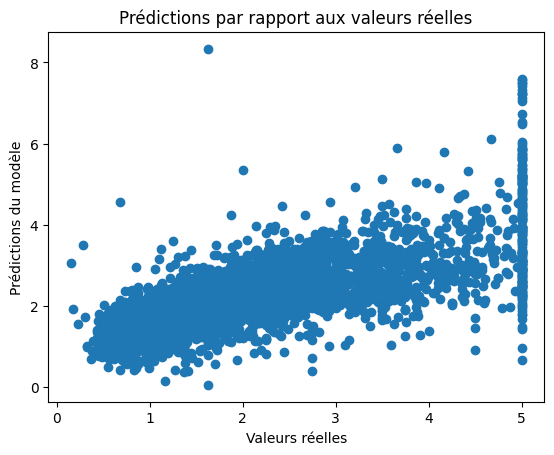

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.layers import Dense

from sklearn.datasets import fetch_california_housing

# Charger le dataset California Housing Prices
data = fetch_california_housing()

# Chargez les données à partir du dataset
X = data.data  # Features
y = data.target   # Target variable (median house value)

# Divisez les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créez un modèle de régression linéaire
model = tf.keras.Sequential([
    Dense(units=1, input_dim=X_train.shape[1], activation='linear')
])

# Compilez le modèle
model.compile(optimizer='adam', loss='mean_squared_error')

# Entraînez le modèle
model.fit(X_train, y_train, epochs=100, verbose=0)

# Effectuez des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculez les métriques de performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# Tracez les prédictions par rapport aux valeurs réelles
plt.scatter(y_test, y_pred)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions du modèle")
plt.title("Prédictions par rapport aux valeurs réelles")
plt.show()


129/129 [==============================] - 1s 3ms/step
Mean Squared Error (MSE): 0.8601885587399843
R-squared (R2): 0.34357244721056


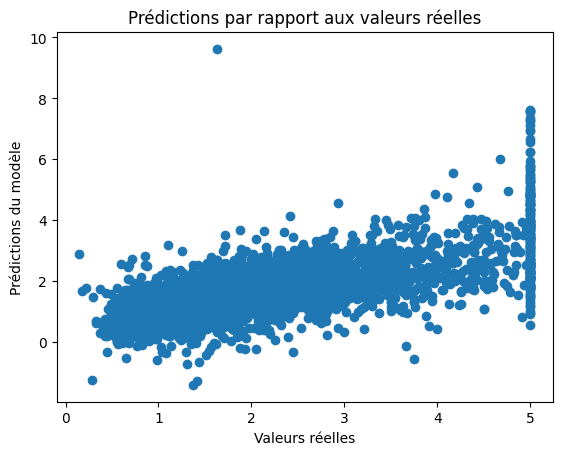

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Charger le dataset California Housing Prices
data = fetch_california_housing()

# Divisez les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Créez un modèle de régression simple
model = Sequential([
    Dense(units=64, input_dim=X_train.shape[1], activation='relu'),
    Dense(units=1)  # Couche de sortie
])

# Compilez le modèle
model.compile(optimizer='adam', loss='mean_squared_error')

# Entraînez le modèle
model.fit(X_train, y_train, epochs=100, verbose=0)

# Effectuez des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculez les métriques de performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# Tracez les prédictions par rapport aux valeurs réelles
plt.scatter(y_test, y_pred)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions du modèle")
plt.title("Prédictions par rapport aux valeurs réelles")
plt.show()


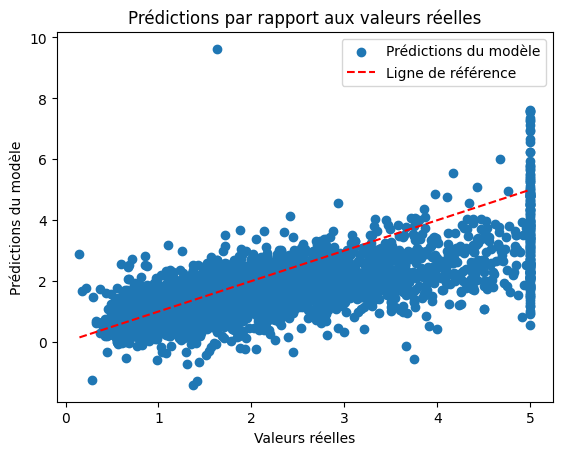

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Créer une plage de valeurs pour la ligne de référence
x_range = np.linspace(min(y_test), max(y_test), 100)

# Créer la ligne de référence
y_range = x_range

# Créer le nuage de points pour les prédictions
plt.scatter(y_test, y_pred, label='Prédictions du modèle')
# Ajouter la ligne de référence
plt.plot(x_range, y_range, color='red', linestyle='--', label='Ligne de référence')

plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions du modèle")
plt.title("Prédictions par rapport aux valeurs réelles")
plt.legend()
plt.show()


Classification

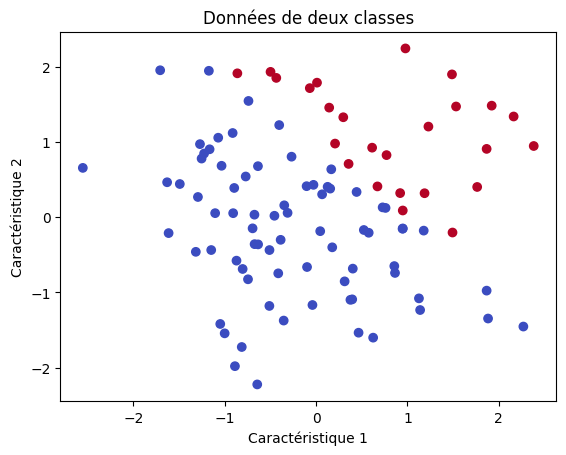

4/4 [==============================] - 0s 2ms/step
Accuracy: 0.87


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Créer un jeu de données simple avec deux classes
np.random.seed(0)
points = 100
X = np.random.normal(0, 1, (points, 2))
y = (X[:, 0] + X[:, 1] > 1).astype(int)

# Visualisation des données
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title('Données de deux classes')
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')
plt.show()

# Créer un modèle avec une seule couche et un neurone pour la classification
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_dim=2, activation='sigmoid')
])

# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
model.fit(X, y, epochs=100, verbose=0)

# Prédire les classes
y_pred = (model.predict(X) > 0.5).astype(int)

# Évaluer les performances du modèle
accuracy = (y == y_pred.squeeze()).mean()
print(f'Accuracy: {accuracy:.2f}')


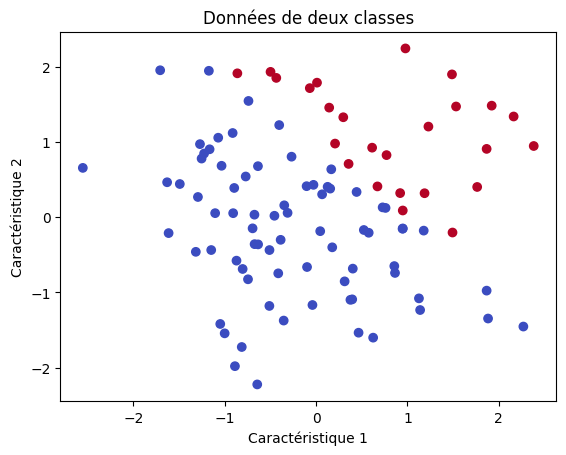

4/4 [==============================] - 0s 3ms/step
Accuracy: 1.00


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Créer un jeu de données simple avec deux classes
np.random.seed(0)
points = 100
X = np.random.normal(0, 1, (points, 2))
y = (X[:, 0] + X[:, 1] > 1).astype(int)

# Visualisation des données
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title('Données de deux classes')
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')
plt.show()

# Créer un modèle avec plusieurs couches et neurones pour la classification
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=32, input_dim=2, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
model.fit(X, y, epochs=100, verbose=0)

# Prédire les classes
y_pred = (model.predict(X) > 0.5).astype(int)

# Évaluer les performances du modèle
accuracy = (y == y_pred.squeeze()).mean()
print(f'Accuracy: {accuracy:.2f}')


Data set IRIS

In [ ]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Charger le dataset Iris
iris = load_iris()
X, y = iris.data, iris.target

# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prétraitement des données (normalisation)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Créer un modèle avec plusieurs couches et neurones
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=32, input_dim=4, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

# Compiler le modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
model.fit(X_train, y_train, epochs=100, verbose=0)

# Prédire les classes
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy:.2f}')


1/1 [==============================] - 0s 89ms/step
Accuracy: 1.00


Comparaison avec la classification classique (machine learning)

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Charger le dataset Iris
iris = load_iris()
X, y = iris.data, iris.target

# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prétraitement des données (normalisation)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Créer et entraîner les modèles de classification
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', C=1),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

# Comparer les performances des modèles
for model_name, accuracy in results.items():
    print(f"{model_name}: Accuracy = {accuracy:.2f}")


Random Forest: Accuracy = 1.00
Support Vector Machine: Accuracy = 0.97
K-Nearest Neighbors: Accuracy = 1.00
Decision Tree: Accuracy = 1.00


Digit

11490434/11490434 [==============================] - 1s 0us/step
Nombre d'images d'entraînement : 60000
Nombre d'images de test : 10000
Taille d'une image : (28, 28)
Labels d'entraînement uniques : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


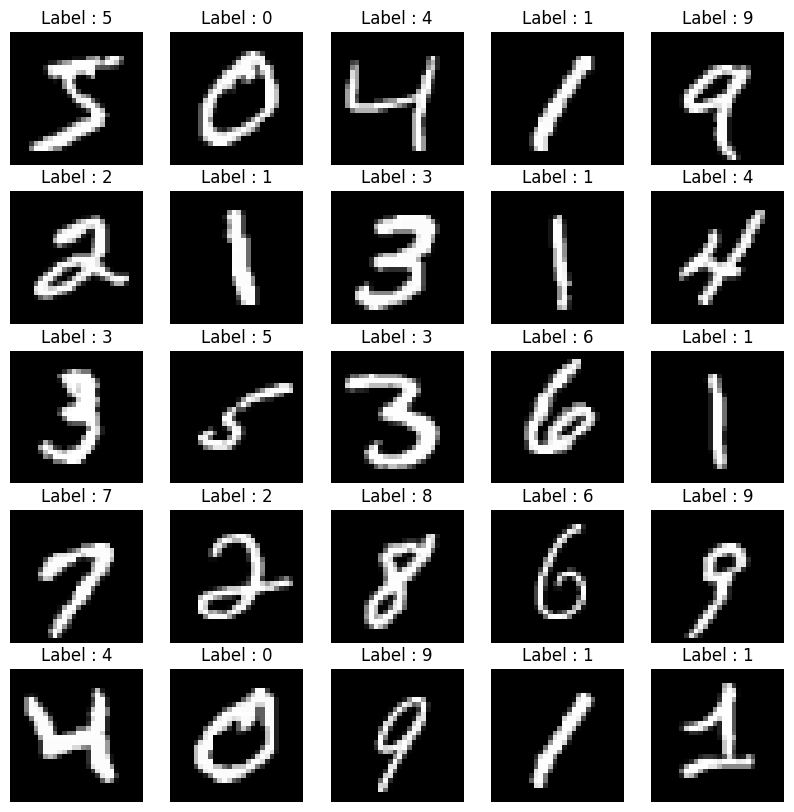

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Charger le dataset MNIST
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Afficher des informations sur le dataset
print(f"Nombre d'images d'entraînement : {len(train_images)}")
print(f"Nombre d'images de test : {len(test_images)}")
print(f"Taille d'une image : {train_images[0].shape}")
print(f"Labels d'entraînement uniques : {set(train_labels)}")

# Afficher quelques exemples d'images et leurs labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label : {train_labels[i]}")
    plt.axis('off')
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow import keras

# Charger le dataset MNIST
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Prétraiter les données
train_images = train_images / 255.0
test_images = test_images / 255.0

# Créer un modèle DNN
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Aplatir les images en vecteurs 1D
    keras.layers.Dense(128, activation='relu'),  # Couche cachée avec activation ReLU
    keras.layers.Dense(64, activation='relu'),   # Autre couche cachée
    keras.layers.Dense(10, activation='softmax')  # Couche de sortie avec activation softmax (10 classes)
])

# Compiler le modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle
model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

# Évaluer la performance sur l'ensemble de test
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Accuracy on test dataset: {test_accuracy}')


Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2660 - accuracy: 0.9222 - val_loss: 0.1388 - val_accuracy: 0.9601
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1105 - accuracy: 0.9665 - val_loss: 0.1166 - val_accuracy: 0.9647
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0755 - accuracy: 0.9767 - val_loss: 0.0977 - val_accuracy: 0.9710
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0571 - accuracy: 0.9821 - val_loss: 0.0975 - val_accuracy: 0.9726
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0443 - accuracy: 0.9854 - val_loss: 0.1014 - val_accuracy: 0.9710
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0382 - accuracy: 0.9876 - val_loss: 0.0914 - val_accuracy: 0.9748
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0302 - accuracy: 0.9898 - val_loss: 0.0970 - val_accuracy:

Comparaison avec les méthode de ML classiques (dataset Digit)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Créer et entraîner les modèles scikit-learn
lr_model = LogisticRegression(max_iter=1000)
svc_model = SVC()
dt_model = DecisionTreeClassifier()

lr_model.fit(train_images.reshape(-1, 28 * 28), train_labels)
svc_model.fit(train_images.reshape(-1, 28 * 28), train_labels)
dt_model.fit(train_images.reshape(-1, 28 * 28), train_labels)

# Prédictions sur l'ensemble de test
lr_predictions = lr_model.predict(test_images.reshape(-1, 28 * 28))
svc_predictions = svc_model.predict(test_images.reshape(-1, 28 * 28))
dt_predictions = dt_model.predict(test_images.reshape(-1, 28 * 28))

# Évaluer les performances
lr_accuracy = accuracy_score(test_labels, lr_predictions)
svc_accuracy = accuracy_score(test_labels, svc_predictions)
dt_accuracy = accuracy_score(test_labels, dt_predictions)

# Évaluer la performance du modèle DNN déjà entraîné
dnn_test_loss, dnn_test_accuracy = model.evaluate(test_images, test_labels)

# Créer un tableau des performances
performance_table = {
    'Algorithme': ['Régression Logistique', 'SVM', 'Arbre de Décision', 'Deep Neural Network'],
    'Précision': [lr_accuracy, svc_accuracy, dt_accuracy, dnn_test_accuracy]
}

# Afficher le tableau des performances
import pandas as pd
performance_df = pd.DataFrame(performance_table)
print(performance_df)


313/313 [==============================] - 1s 2ms/step - loss: 0.1122 - accuracy: 0.9753
              Algorithme  Précision
0  Régression Logistique     0.9256
1                    SVM     0.9792
2      Arbre de Décision     0.8791
3    Deep Neural Network     0.9753


Un data set un peu plus complexe Fashion MNIST

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Charger le dataset Fashion MNIST depuis Keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Définir les noms de classe pour Fashion MNIST
class_names = ['T-shirt/top', 'Pantalon', 'Pull', 'Robe', 'Manteau', 'Sandale', 'Chemise', 'Sneaker', 'Sac', 'Bottine']

# Normaliser les valeurs des pixels dans l'intervalle [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Créer un modèle DNN (vous pouvez personnaliser la structure du modèle)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Couche d'aplatissage
    keras.layers.Dense(128, activation='relu'),  # Couche cachée avec activation ReLU
    keras.layers.Dense(10, activation='softmax')  # Couche de sortie pour les 10 classes
])

# Compiler le modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle
model.fit(train_images, train_labels, epochs=50)

# Évaluer la performance du modèle
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print("Précision sur l'ensemble de test :", test_accuracy)

# Faites des prédictions sur quelques images de l'ensemble de test
predictions = model.predict(test_images)


Epoch 1/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5000 - accuracy: 0.8248
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3758 - accuracy: 0.8662
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3358 - accuracy: 0.8770
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3120 - accuracy: 0.8852
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2946 - accuracy: 0.8908
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2808 - accuracy: 0.8964
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2682 - accuracy: 0.9001
Epoch 8/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2571 - accuracy: 0.9039
Epoch 9/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2487 - accuracy: 0.9068
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.240

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Réduisez les données d'images 2D en vecteurs 1D
n_samples, image_height, image_width = train_images.shape
X_train = train_images.reshape((n_samples, -1))
X_test = test_images.reshape((test_images.shape[0], -1))

# Entraînez et évaluez les modèles classiques
models = {
    "Logistic Regression": LogisticRegression(max_iter=100),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(),
}

for model_name, model in models.items():
    model.fit(X_train, train_labels)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(test_labels, y_pred)
    print(f"{model_name} - Précision : {accuracy:.4f}")


c:\Users\tawfi\.conda\envs\um6p\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Précision : 0.8439
Random Forest - Précision : 0.8740
SVM - Précision : 0.8828
